# Laboratorio: Red Neuronal con MNIST

##Paso 1: Cargar el conjunto de datos MNIST (1 punto)
Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.

In [1]:
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)


##Paso 2: Visualizar ejemplos del dataset (1 punto)

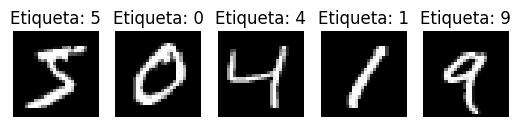

In [2]:
import matplotlib.pyplot as plt

# Mostrar 5 imágenes del dataset
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()


##Paso 3: Preprocesamiento (1 punto)

In [3]:
from tensorflow.keras.utils import to_categorical

# Normalización
x_train = x_train / 255.0
x_test = x_test / 255.0

# Aplanar imágenes
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Codificación one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


##Paso 4: Definir la red neuronal (2 puntos)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definición del modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Paso 5: Entrenar el modelo (1 punto)

In [5]:
# Entrenamiento del modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8805 - loss: 0.4263
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9653 - loss: 0.1228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9769 - loss: 0.0803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9829 - loss: 0.0552
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9864 - loss: 0.0432


##Paso 6: Evaluar el modelo (1 punto)

In [6]:
# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el set de prueba: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0913
Precisión en el set de prueba: 0.9761


##Preguntas de Reflexión (3 puntos)
###¿Qué ventaja observas al usar codificación one-hot para las etiquetas?
 Representación multiclase clara, necesaria para aplicar funciones como categorical_crossentropy, tambien evita confusiones al interpretar clases como valores ordinales.

###¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas?
Aumentar neuronas puede mejorar la capacidad de aprendizaje del modelo, pero también aumenta el riesgo de sobreajuste. Disminuirlas puede reducir la capacidad del modelo para aprender patrones complejos.

###¿Qué alternativa propondrías al optimizador adam y por qué?
El uso de RMSprop es una buena alternativa para problemas con datos no estacionarios, ya que ajusta dinámicamente la tasa de aprendizaje para cada parámetro.

###¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo?
El desempeño puede mejorar inicialmente, pero si se entrena demasiado, el modelo puede sobreajustarse, perdiendo capacidad de generalización en datos nuevos.

###¿Por qué es importante dividir en conjuntos de entrenamiento y prueba?
Es importante porque sirve para evaluar el rendimiento del modelo en datos no vistos y asegurar que generaliza correctamente, evitando que solo memorice el conjunto de entrenamiento.